# Import libraries and Dataset


Includes Phase 1 and 2

In [47]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [48]:
# importing dataset
dataset = pd.read_csv("/kaggle/input/airline/Invistico_Airline.csv")

# Step 1: Descriptive Statistics

In [49]:
# Preview data
dataset.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [50]:
# Dataset dimensions - (rows, columns)
dataset.shape

(129880, 23)

In [51]:
dataset['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [52]:
dataset.groupby('satisfaction').mean()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,
dissatisfied,37.466671,2025.709234,2.467335,3.016686,2.660419,3.007756,2.919854,2.608644,2.959213,2.852261,2.973126,3.052625,3.364601,2.971850,3.377324,2.869695,17.807749,18.504599
satisfied,41.050051,1944.770281,3.145653,2.969108,3.010438,2.976086,3.521460,4.024308,3.983260,3.984751,3.871946,3.844247,3.969488,3.645955,3.977394,3.751966,12.154768,12.268883


In [53]:
# separating the data and labels
X = dataset.drop(columns = 'satisfaction',axis =1)
Y = dataset['satisfaction']

In [54]:
print(X)

        Gender      Customer Type  Age   Type of Travel     Class  \
0       Female     Loyal Customer   65  Personal Travel       Eco   
1         Male     Loyal Customer   47  Personal Travel  Business   
2       Female     Loyal Customer   15  Personal Travel       Eco   
3       Female     Loyal Customer   60  Personal Travel       Eco   
4       Female     Loyal Customer   70  Personal Travel       Eco   
...        ...                ...  ...              ...       ...   
129875  Female  disloyal Customer   29  Personal Travel       Eco   
129876    Male  disloyal Customer   63  Personal Travel  Business   
129877    Male  disloyal Customer   69  Personal Travel       Eco   
129878    Male  disloyal Customer   66  Personal Travel       Eco   
129879  Female  disloyal Customer   38  Personal Travel       Eco   

        Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0                   265             0                                  0   
1                  

In [55]:
print(Y)

0            satisfied
1            satisfied
2            satisfied
3            satisfied
4            satisfied
              ...     
129875       satisfied
129876    dissatisfied
129877    dissatisfied
129878    dissatisfied
129879    dissatisfied
Name: satisfaction, Length: 129880, dtype: object


In [56]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [57]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [58]:
# Count of null values
dataset.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

# Observations:

1)There are a total of 129880 records and 22 features in the dataset.
2)Each feature can be either of integer or float or object dataype.
3)Some features like Cleanliness,Flight Distance etc have zero values which represent missing data.

# Data Preprocessing

**Cleaning Data**

In [59]:
dataset=dataset.drop(['Gender','Age','Type of Travel','Gate location','Online boarding'],axis=1)

**Converting satisfaction from string to int**

In the Satisfaction column, now 1 represents satisfied and 0 represents dissatisfied.

In [60]:
map = {'satisfied':1, 'dissatisfied':0}
dataset.applymap(lambda s: map.get(s) if s in map else s)


,satisfaction,Customer Type,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,Eco,265,0,0,0,2,4,2,3,3,0,3,5,3,0,0.0
1,1,Loyal Customer,Business,2464,0,0,0,0,2,2,3,4,4,4,2,3,310,305.0
2,1,Loyal Customer,Eco,2138,0,0,0,2,0,2,2,3,3,4,4,4,0,0.0
3,1,Loyal Customer,Eco,623,0,0,0,3,4,3,1,1,0,1,4,1,0,0.0
4,1,Loyal Customer,Eco,354,0,0,0,4,3,4,2,2,0,2,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,disloyal Customer,Eco,1731,5,5,5,2,5,2,2,3,3,4,4,4,0,0.0
129876,0,disloyal Customer,Business,2087,2,3,2,2,1,1,3,2,3,3,1,2,174,172.0
129877,0,disloyal Customer,Eco,2320,3,0,3,3,2,2,4,4,3,4,2,3,155,163.0
129878,0,disloyal Customer,Eco,2450,3,2,3,3,2,2,3,3,2,3,2,1,193,205.0


# Missing Observation Analysis

We saw on dataset.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [61]:
dataset_final=dataset

In [62]:
# Now, we can look at where are missing values
dataset.isnull().sum()

satisfaction                           0
Customer Type                          0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [63]:
# Replacing NaN with mean values
dataset_final["Arrival Delay in Minutes"].fillna(dataset["Arrival Delay in Minutes"].mean(), inplace = True)

In [64]:
# new dataset with replaced values
dataset_final.isnull().sum()

satisfaction                         0
Customer Type                        0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [65]:
# Statistical summary
dataset_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0
On-board service,129880.0,3.465075,1.270836,0.0,3.0,4.0,4.0,5.0
Leg room service,129880.0,3.485902,1.292226,0.0,2.0,4.0,5.0,5.0


In [66]:

dataset_final.columns = dataset_final.columns.str.replace(' ', '')
dataset_final.head(-1)

,satisfaction,CustomerType,Class,FlightDistance,Seatcomfort,Departure/Arrivaltimeconvenient,Foodanddrink,Inflightwifiservice,Inflightentertainment,Onlinesupport,EaseofOnlinebooking,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
0,satisfied,Loyal Customer,Eco,265,0,0,0,2,4,2,3,3,0,3,5,3,0,0.0
1,satisfied,Loyal Customer,Business,2464,0,0,0,0,2,2,3,4,4,4,2,3,310,305.0
2,satisfied,Loyal Customer,Eco,2138,0,0,0,2,0,2,2,3,3,4,4,4,0,0.0
3,satisfied,Loyal Customer,Eco,623,0,0,0,3,4,3,1,1,0,1,4,1,0,0.0
4,satisfied,Loyal Customer,Eco,354,0,0,0,4,3,4,2,2,0,2,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,satisfied,disloyal Customer,Eco,2752,5,5,5,2,5,2,2,3,5,3,5,4,5,0.0
129875,satisfied,disloyal Customer,Eco,1731,5,5,5,2,5,2,2,3,3,4,4,4,0,0.0
129876,dissatisfied,disloyal Customer,Business,2087,2,3,2,2,1,1,3,2,3,3,1,2,174,172.0
129877,dissatisfied,disloyal Customer,Eco,2320,3,0,3,3,2,2,4,4,3,4,2,3,155,163.0


In [67]:
dataset_final.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [68]:
dataset_final.satisfaction[dataset_final.satisfaction == 'satisfied'] = 1
dataset_final.satisfaction[dataset_final.satisfaction == 'dissatisfied'] = 0

dataset_final.CustomerType[dataset_final.CustomerType == 'Loyal Customer'] = 1
dataset_final.CustomerType[dataset_final.CustomerType == 'disloyal Customer'] = 0


dataset_final.Class[dataset_final.Class == 'Eco'] = 0
dataset_final.Class[dataset_final.Class == 'Eco Plus'] = 1
dataset_final.Class[dataset_final.Class == 'Business'] = 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3

In [69]:
dataset_final.Class.unique()

array([0, 2, 1], dtype=object)

In [70]:
dataset_final['satisfaction']


0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: object

In [71]:
dataset_final['satisfaction'] = pd.to_numeric(dataset_final['satisfaction'])
dataset_final['Class'] = pd.to_numeric(dataset_final['Class'])
dataset_final['CustomerType'] = pd.to_numeric(dataset_final['CustomerType'])

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

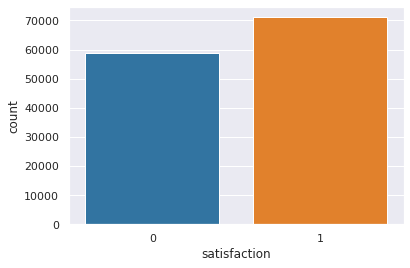

In [72]:
# Outcome countplot
import seaborn as sns
sns.countplot(x = 'satisfaction',data = dataset_final)

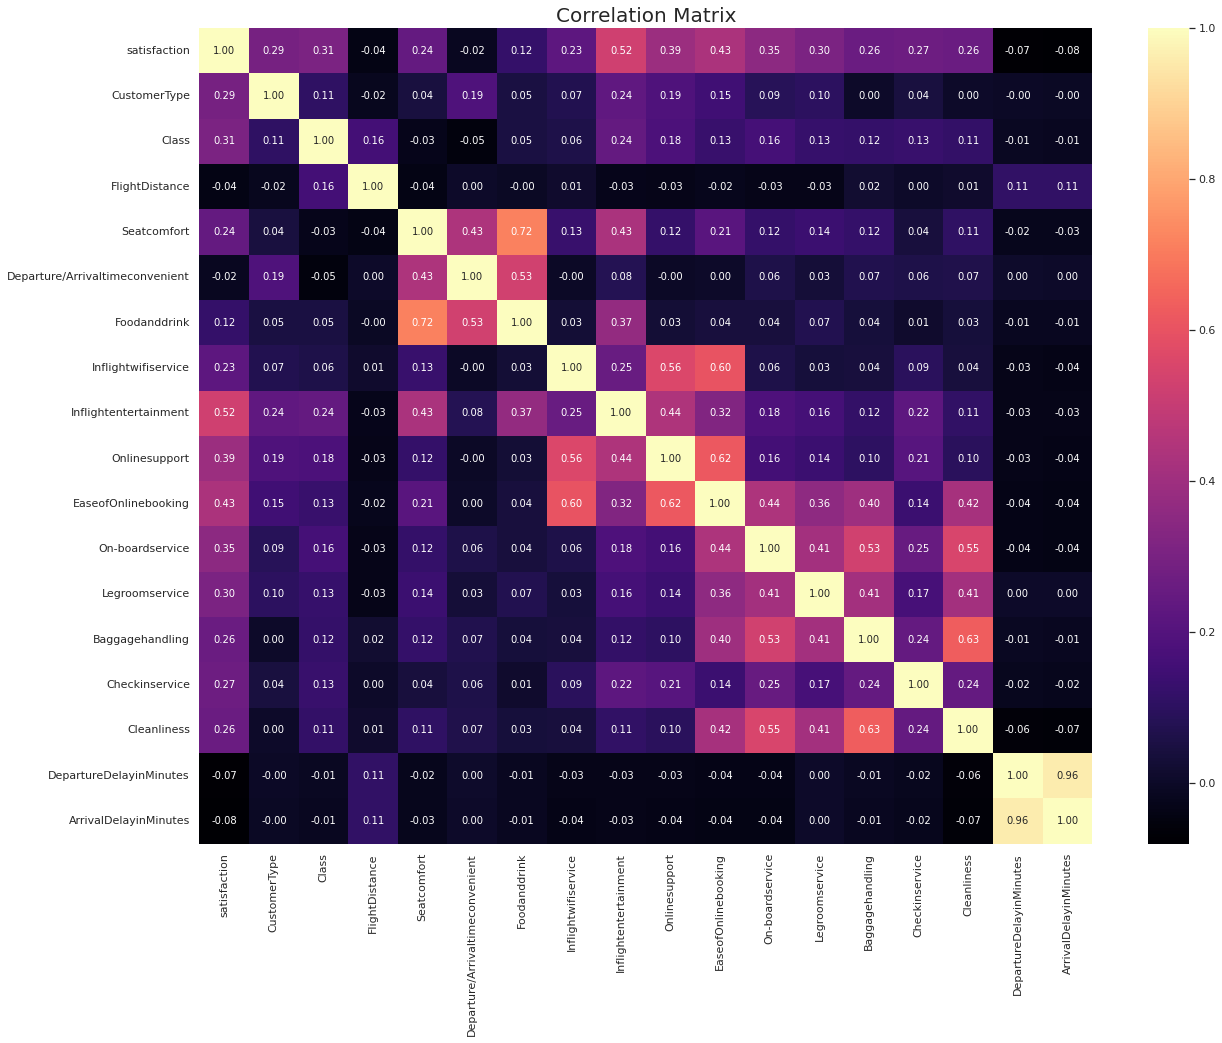

In [73]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(dataset_final.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

y = dataset_final.iloc[:, 0]
X = dataset_final.iloc[:, 1:]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [75]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (103904, 17)
X_test shape: (25976, 17)
Y_train shape: (103904,)
Y_test shape: (25976,)


In [76]:
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
        CustomerType  Class  FlightDistance  Seatcomfort  \
24986              1      0              75            1   
52096              0      0            1145            3   
114671             1      2            2281            5   
76726              1      2            3459            2   
89451              1      2            2454            5   

        Departure/Arrivaltimeconvenient  Foodanddrink  Inflightwifiservice  \
24986                                 1             1                    5   
52096                                 2             3                    4   
114671                                5             5                    5   
76726                                 5             5                    5   
89451                                 5             5                    2   

        Inflightentertainment  Onlinesupport  EaseofOnlinebooking  \
24986                       5              5                    5   
52096                

In [77]:
X_train.head()

,CustomerType,Class,FlightDistance,Seatcomfort,Departure/Arrivaltimeconvenient,Foodanddrink,Inflightwifiservice,Inflightentertainment,Onlinesupport,EaseofOnlinebooking,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
24986,1,0,75,1,1,1,5,5,5,5,3,4,5,5,5,0,10.0
52096,0,0,1145,3,2,3,4,3,4,4,1,4,4,1,3,24,9.0
114671,1,2,2281,5,5,5,5,5,4,5,5,5,5,5,5,0,0.0
76726,1,2,3459,2,5,5,5,4,3,2,2,2,2,3,2,0,0.0
89451,1,2,2454,5,5,5,2,3,5,4,4,4,4,5,4,47,31.0


# Data Visualization
# 

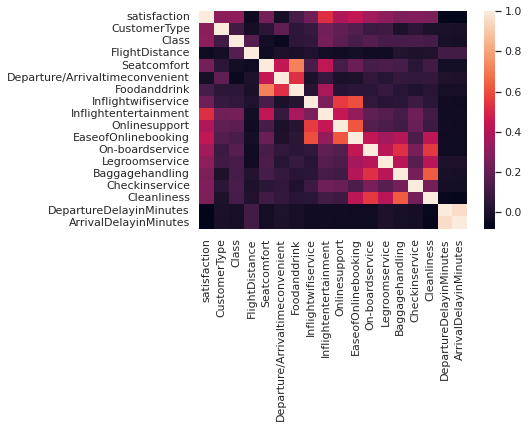

In [78]:
sns.heatmap(dataset_final.corr())
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


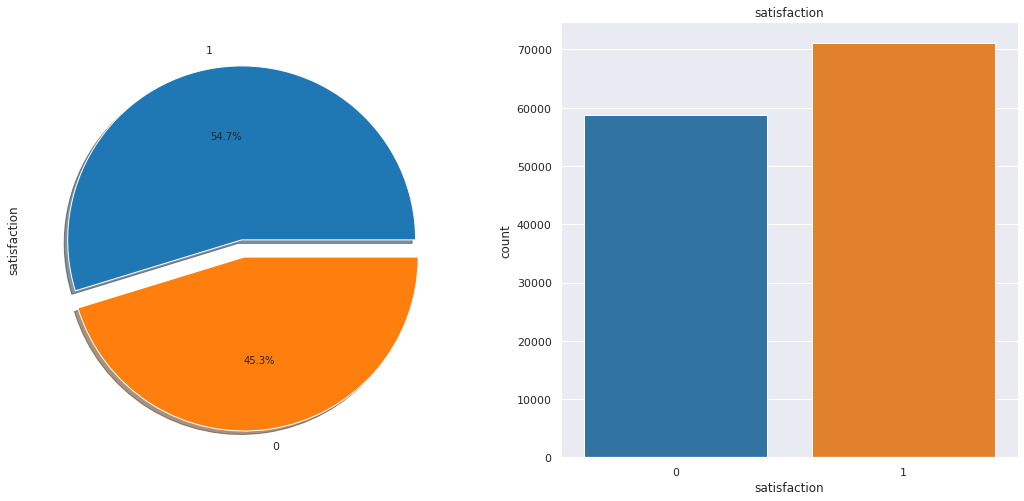

In [79]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset_final['satisfaction'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('satisfaction',data=dataset_final)
ax[1].set_title('satisfaction')
plt.show()

# Learning Algorithm

### **KNN Algorithm**
 

In [80]:
scores_dict = {}


In [81]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 24986 to 68268
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CustomerType                     103904 non-null  int64  
 1   Class                            103904 non-null  int64  
 2   FlightDistance                   103904 non-null  int64  
 3   Seatcomfort                      103904 non-null  int64  
 4   Departure/Arrivaltimeconvenient  103904 non-null  int64  
 5   Foodanddrink                     103904 non-null  int64  
 6   Inflightwifiservice              103904 non-null  int64  
 7   Inflightentertainment            103904 non-null  int64  
 8   Onlinesupport                    103904 non-null  int64  
 9   EaseofOnlinebooking              103904 non-null  int64  
 10  On-boardservice                  103904 non-null  int64  
 11  Legroomservice                   103904 non-null  int64  
 12 

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
n_value = []
for i in range (1,11,2):
    model_knn = KNeighborsClassifier(n_neighbors =i).fit(X_train, y_train)
    knn_scores.append(model_knn.score(X_test,y_test))
    n_value.append(i)  


In [83]:
knn_scores

[0.7264397905759162,
 0.7402217431475208,
 0.7468817369879889,
 0.7477671696951032,
 0.7463042808746535]

In [84]:
n_value

[1, 3, 5, 7, 9]

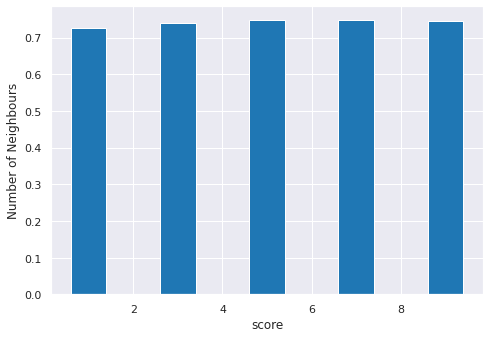

In [85]:
knn_scores = np.array(knn_scores)
n_value = np.array(n_value)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("score")
ax.set_ylabel("Number of Neighbours")
ax.bar(n_value,knn_scores)
plt.show()

### **Logistic Regression**

In [86]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression().fit(X_train, y_train)

model_log.score(X_test,y_test)
    
 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.76093316907915

### **Random Forest Classifier**

In [87]:
from sklearn.ensemble import RandomForestClassifier


model_rfc = RandomForestClassifier().fit(X_train, y_train)
model_rfc.score(X_test,y_test)
    
 

0.9464505697566985

**Accuracy**

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std


cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model_knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_dict['KNeighborsClassifier'] = mean(scores)*100
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.753 (0.003)


In [89]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model_log, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_dict['LogisiticRegression'] = mean(scores)*100
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.758 (0.004)


In [90]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model_rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores_dict['RandomForest'] = mean(scores)*100
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.948 (0.001)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


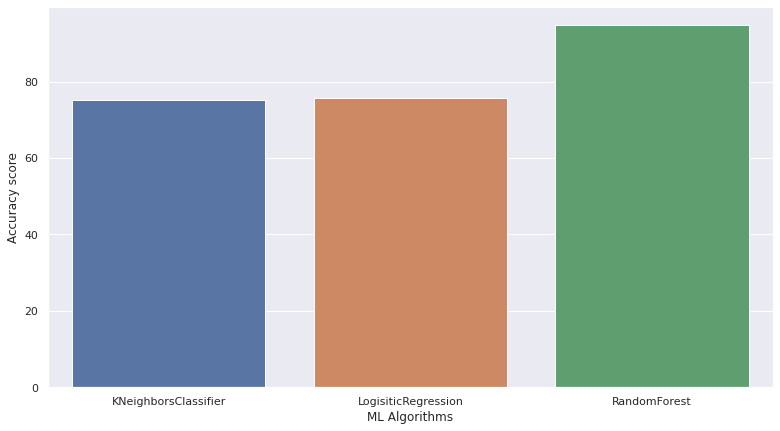

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [91]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(13,7)})
  plt.xlabel("ML Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)

***Conclusion: Among the 3 algorithms , RandomForest Algorithm has the highest accuracy in classification***